##### https://github.com/AI4Finance-Foundation/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/master/backtesting.ipynb

In [125]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv("./day_stock_data.csv")
data.shape

(11338, 8)

In [46]:
data.head()

,Unnamed: 0,날짜,시가,고가,저가,종가,거래량,주가변동
0,0,19800104,42,43,41,41,528022,1
1,1,19800105,40,42,40,42,1580051,1
2,2,19800107,43,44,43,44,2425288,1
3,3,19800108,47,47,45,47,5396669,1
4,4,19800109,47,49,46,49,4993123,1


In [47]:
data = data.drop(['Unnamed: 0'], 1)

In [48]:
data = data.drop(range(0,9900), axis=0)
data.shape

(1438, 7)

In [49]:
data['날짜'] = data['날짜'].astype('str')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 9900 to 11337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1438 non-null   object
 1   시가      1438 non-null   int64 
 2   고가      1438 non-null   int64 
 3   저가      1438 non-null   int64 
 4   종가      1438 non-null   int64 
 5   거래량     1438 non-null   int64 
 6   주가변동    1438 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.8+ KB


In [51]:
test_data=data[(data['날짜']>='2017-07-13') & (data['날짜']<='2022-05-18')]

In [52]:
test_data = test_data.reset_index(drop=True)

In [53]:
test_data.shape

(1229, 7)

In [54]:
test_data.head()

,날짜,시가,고가,저가,종가,거래량,주가변동
0,20170102,35980,36240,35880,36100,4650600,1
1,20170103,36280,36620,36020,36480,7357650,0
2,20170104,36500,36520,36100,36160,7971750,0
3,20170105,36060,36060,35540,35560,10967450,1
4,20170106,36180,36440,36040,36200,8880950,1


In [55]:
test_data['daily_return']=test_data['종가'].pct_change(1)

## XGboost

In [137]:
df=pd.read_csv('./day_stock_data.csv')

In [138]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df['날짜'] > 20160801)&(df['날짜'] <= 20220518)]

In [139]:
df_trade_date = pd.DataFrame(unique_trade_date)

In [140]:
df_trade_date = df_trade_date.drop(['Unnamed: 0'], 1)

In [141]:
df_trade_date

,날짜,시가,고가,저가,종가,거래량,주가변동
9914,20160802,31360,31360,30920,30960,8315800,0
9915,20160803,30960,30960,30340,30340,7504900,0
9916,20160804,30380,30660,30340,30340,7009950,1
9917,20160805,30580,31280,30500,31220,6958850,1
9918,20160808,31320,31500,31120,31380,11125150,0
...,...,...,...,...,...,...,...
11333,20220512,65200,65500,64900,64900,16414188,1
11334,20220513,65300,66700,65200,66500,14551536,0
11335,20220516,67100,67400,66100,66300,11937555,1
11336,20220517,66600,67900,66600,67600,15680447,1


In [142]:
df_trade_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 9914 to 11337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      1424 non-null   int64
 1   시가      1424 non-null   int64
 2   고가      1424 non-null   int64
 3   저가      1424 non-null   int64
 4   종가      1424 non-null   int64
 5   거래량     1424 non-null   int64
 6   주가변동    1424 non-null   int64
dtypes: int64(7)
memory usage: 89.0 KB


In [143]:
df_trade_date.shape

(1424, 7)

In [144]:
scaler_ = MinMaxScaler()
scaler_.fit(df_trade_date)
xy_scaled = scaler_.transform(df_trade_date)

In [145]:
xy_scaled_df = pd.DataFrame(xy_scaled, columns=df_trade_date.columns)

In [146]:
xy_scaled_df

,날짜,시가,고가,저가,종가,거래량,주가변동
0,0.000000,0.025785,0.018596,0.029811,0.026904,0.092085,0.0
1,0.000017,0.019174,0.012597,0.020205,0.016856,0.083105,0.0
2,0.000033,0.009587,0.008098,0.020205,0.016856,0.077624,1.0
3,0.000050,0.012893,0.017397,0.022855,0.031118,0.077058,1.0
4,0.000100,0.025124,0.020696,0.033124,0.033712,0.123194,0.0
...,...,...,...,...,...,...,...
1419,0.999900,0.585124,0.530594,0.592580,0.576985,0.181762,1.0
1420,0.999916,0.586777,0.548590,0.597549,0.602917,0.161136,0.0
1421,0.999967,0.616529,0.559088,0.612454,0.599676,0.132190,1.0
1422,0.999983,0.608264,0.566587,0.620735,0.620746,0.173636,1.0


In [147]:
xy_scaled_df = xy_scaled_df.drop(['날짜'], 1)

In [149]:
X = xy_scaled_df.iloc[:, 0:5]
Y = xy_scaled_df.iloc[:, 5]

In [151]:
seed = 5
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)

In [152]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [153]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

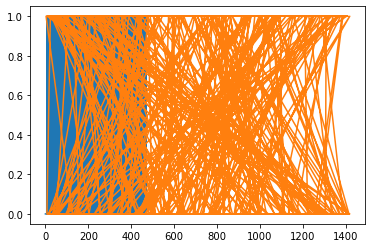

In [154]:
plt.plot(predictions)
plt.plot(y_test)
plt.show()

In [155]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy_score:%.2f%%'%(accuracy*100.0))

accuracy_score:50.00%
